In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from matplotlib.colors import ListedColormap
import jax.numpy as jnp
import initialize_nets
import reaction_nets
import jax
from diffrax import diffeqsolve, ODETerm, Tsit5, SaveAt, PIDController, Kvaerno3

In [104]:
file = open('data/triangle a/train_features', 'rb')
train_features=pkl.load(file)
file.close()

file = open('data/triangle a/train_labels', 'rb')
train_labels=pkl.load(file)
file.close()

file = open('data/triangle a/val_features', 'rb')
val_features=pkl.load(file)
file.close()

file = open('data/triangle a/val_labels', 'rb')
val_labels=pkl.load(file)
file.close()

file = open('data/triangle a/pred_labels', 'rb')
pred_labels=pkl.load(file)
file.close()

file = open('data/triangle a/optimized_params', 'rb')
opt_params=pkl.load(file)
file.close()

file = open('data/triangle a/loss_history', 'rb')
loss_history=pkl.load(file)
file.close()

In [105]:
init_data_file='data/init_data/triangle_a'
num_epochs =  3 #20 
t_points = jnp.linspace(0.0, 10.0, 100) 

#read in training and network info

file = open(init_data_file, 'rb')
init_data_dict=pkl.load(file)
file.close()

net_type, initial_params, t_points, train_features, train_labels, initial_conditions, true_params, training_data_type, train_features, train_labels, val_features, val_labels=init_data_dict['network_type'], init_data_dict['initial_params'], init_data_dict['t_points'], init_data_dict['train_features'], init_data_dict['train_labels'], init_data_dict['initial_conditions'], init_data_dict['true_params'], init_data_dict['training_data_type'], init_data_dict['train_features'], init_data_dict['train_labels'], init_data_dict['val_features'], init_data_dict['val_labels']

In [106]:
solver=Tsit5()
stepsize_controller=PIDController(0.005, 0.01)
t_points=jnp.linspace(0.0, 10.0, 100)
dt0=0.001
max_steps=10000

In [107]:
rxn=reaction_nets.rxn_net(net_type)
init_labels=initialize_nets.profile(rxn, initial_params, initial_conditions, val_features, solver, stepsize_controller, t_points, dt0, max_steps)

In [108]:
init_labels=jnp.exp(init_labels)

In [109]:
pred_labels=initialize_nets.profile(rxn, opt_params, initial_conditions, val_features, solver, stepsize_controller, t_points, dt0, max_steps)

In [110]:
pred_labels=jnp.exp(pred_labels)

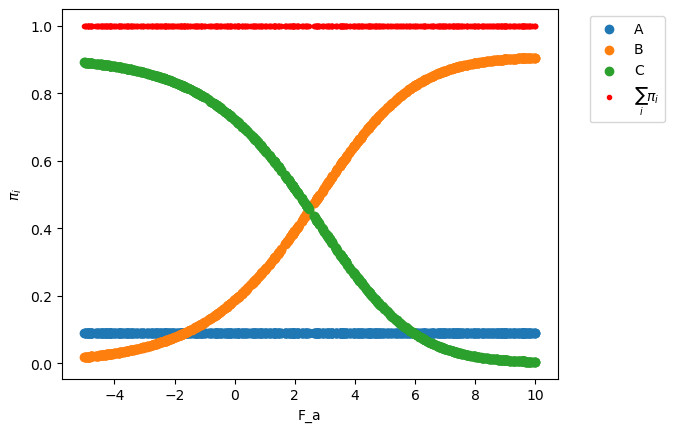

In [111]:
label=['A', 'B', 'C']
for i, species_labels in enumerate(train_labels.T):
    plt.scatter(train_features, species_labels, label=f'{label[i]}')
plt.scatter(train_features, np.sum(train_labels, axis=1), color='r', marker='.', label=r'$\sum_i \pi_i$')
plt.xlabel('F_a')
plt.ylabel(r'$\pi_i$')
plt.legend(bbox_to_anchor=[1.05, 1], loc='upper left')
plt.savefig('data/train_features.png', dpi=300, bbox_inches='tight')


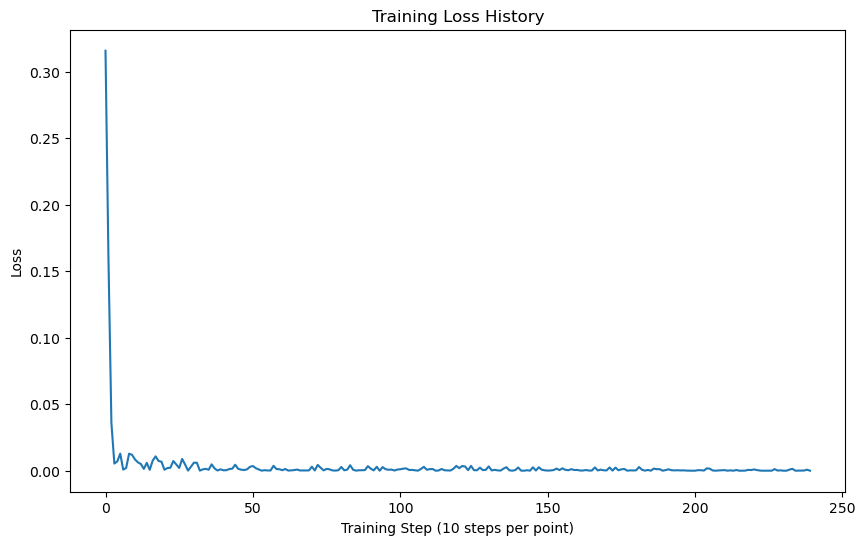

In [112]:
# Plot loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Training Step (10 steps per point)')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.savefig('data/loss_history.png')  

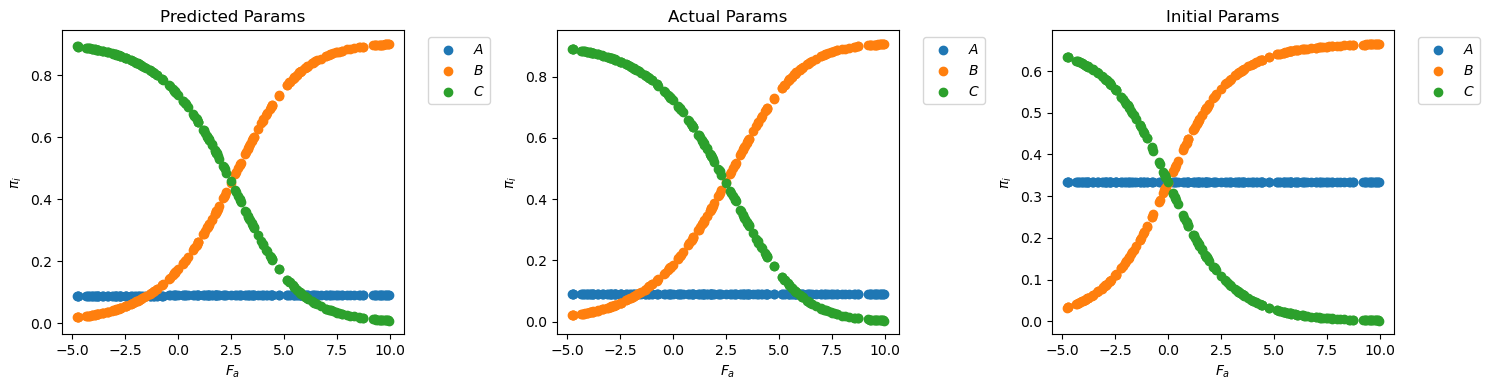

In [113]:
cmap = plt.colormaps['tab10']
colors = cmap(np.linspace(0, 1, 10))
fig=plt.figure(figsize=(15, 4))
gs=fig.add_gridspec(1, 3)

pred_ax=fig.add_subplot(gs[0, 0])
val_ax=fig.add_subplot(gs[0, 1])
init_ax=fig.add_subplot(gs[0, 2])

pred_ax.set_title('Predicted Params')
val_ax.set_title('Actual Params')
init_ax.set_title('Initial Params')

for i, species in enumerate(label):
    #plot the predicted and actual labels as a function of the feature
    
    #exponentiate if using EX 5
    pred_ax.scatter(val_features, pred_labels.T[i], label=f'${species}$', color=colors[i])
    val_ax.scatter(val_features, val_labels.T[i], label=f'${species}$', color=colors[i])
    init_ax.scatter(val_features, init_labels.T[i], label=f'${species}$', color=colors[i])

pred_ax.set_xlabel(r'$F_a$')
pred_ax.set_ylabel(r'$\pi_i$')

val_ax.set_xlabel(r'$F_a$')
val_ax.set_ylabel(r'$\pi_i$')

init_ax.set_xlabel(r'$F_a$')
init_ax.set_ylabel(r'$\pi_i$')

pred_ax.legend(bbox_to_anchor=[1.05, 1], loc='upper left')
val_ax.legend(bbox_to_anchor=[1.05, 1], loc='upper left')
init_ax.legend(bbox_to_anchor=[1.05, 1], loc='upper left')

fig.tight_layout()
fig.savefig('data/predicted_and_optimized_profiles.png')

In [114]:
pred_labels-val_labels

Array([[ 1.02693490e-03, -5.63357391e-03,  4.60663901e-03],
       [-1.01472718e-03, -1.36790871e-02,  1.46938143e-02],
       [ 7.53368132e-04,  2.24166568e-03, -2.99503381e-03],
       [-1.20854020e-03, -1.09981162e-02,  1.22066564e-02],
       [-1.38952842e-03, -5.35842680e-03,  6.74795522e-03],
       [ 3.37236214e-04,  6.26067997e-03, -6.59791619e-03],
       [-5.07396212e-04, -9.68438041e-03,  1.01917766e-02],
       [-1.43019456e-03, -3.59627246e-03,  5.02646698e-03],
       [-6.94849980e-04, -1.25422297e-02,  1.32370797e-02],
       [-1.43695600e-03, -3.28397049e-03,  4.72092644e-03],
       [-1.30417008e-03, -8.44340752e-03,  9.74757761e-03],
       [ 4.02982556e-04,  6.62617712e-03, -7.02915967e-03],
       [ 1.02719067e-03, -5.61546080e-03,  4.58827012e-03],
       [ 1.03117028e-03, -5.30005137e-03,  4.26888109e-03],
       [-6.05319500e-04, -1.13277630e-02,  1.19330825e-02],
       [ 7.87569201e-04,  1.08988734e-03, -1.87745655e-03],
       [-1.38632237e-03, -5.48905445e-03

In [115]:
opt_W_ij=jnp.exp(np.sum(np.reshape(opt_params, shape=(6, 3)), axis=1))
true_W_ij=jnp.exp(np.sum(jnp.reshape(true_params, shape=(6, 3)), axis=1))
initial_W_ij=jnp.exp(jnp.sum(jnp.reshape(initial_params, shape=(6, 3)), axis=1))

In [116]:
print(opt_W_ij)
print(true_W_ij)
print(initial_W_ij)

[ 4.72190201 29.7022867   4.66319974  6.46072908  5.87605101 10.26358042]
[ 1.   10.    1.    0.1   0.05  4.  ]
[4.48168907 4.48168907 4.48168907 4.48168907 4.48168907 4.48168907]


compare gradients from fde and autodiff

In [7]:
file = open('data/grads_per_epoch_autodiff', 'rb')
grads_per_epoch_autodiff=pkl.load(file)
file.close()

file = open('data/grads_per_epoch_fde', 'rb')
grads_per_epoch_fde=pkl.load(file)
file.close()

In [8]:
params=['E_AB', 'B_AB', 'F_AB', 'E_BA', 'B_BA', 'F_BA', 'E_AC', 'B_AC', 'F_AC', 'E_CA', 'B_CA','F_CA', 'E_BC', 'B_BC', 'F_BC', 'E_CB', 'B_CB', 'F_CB']

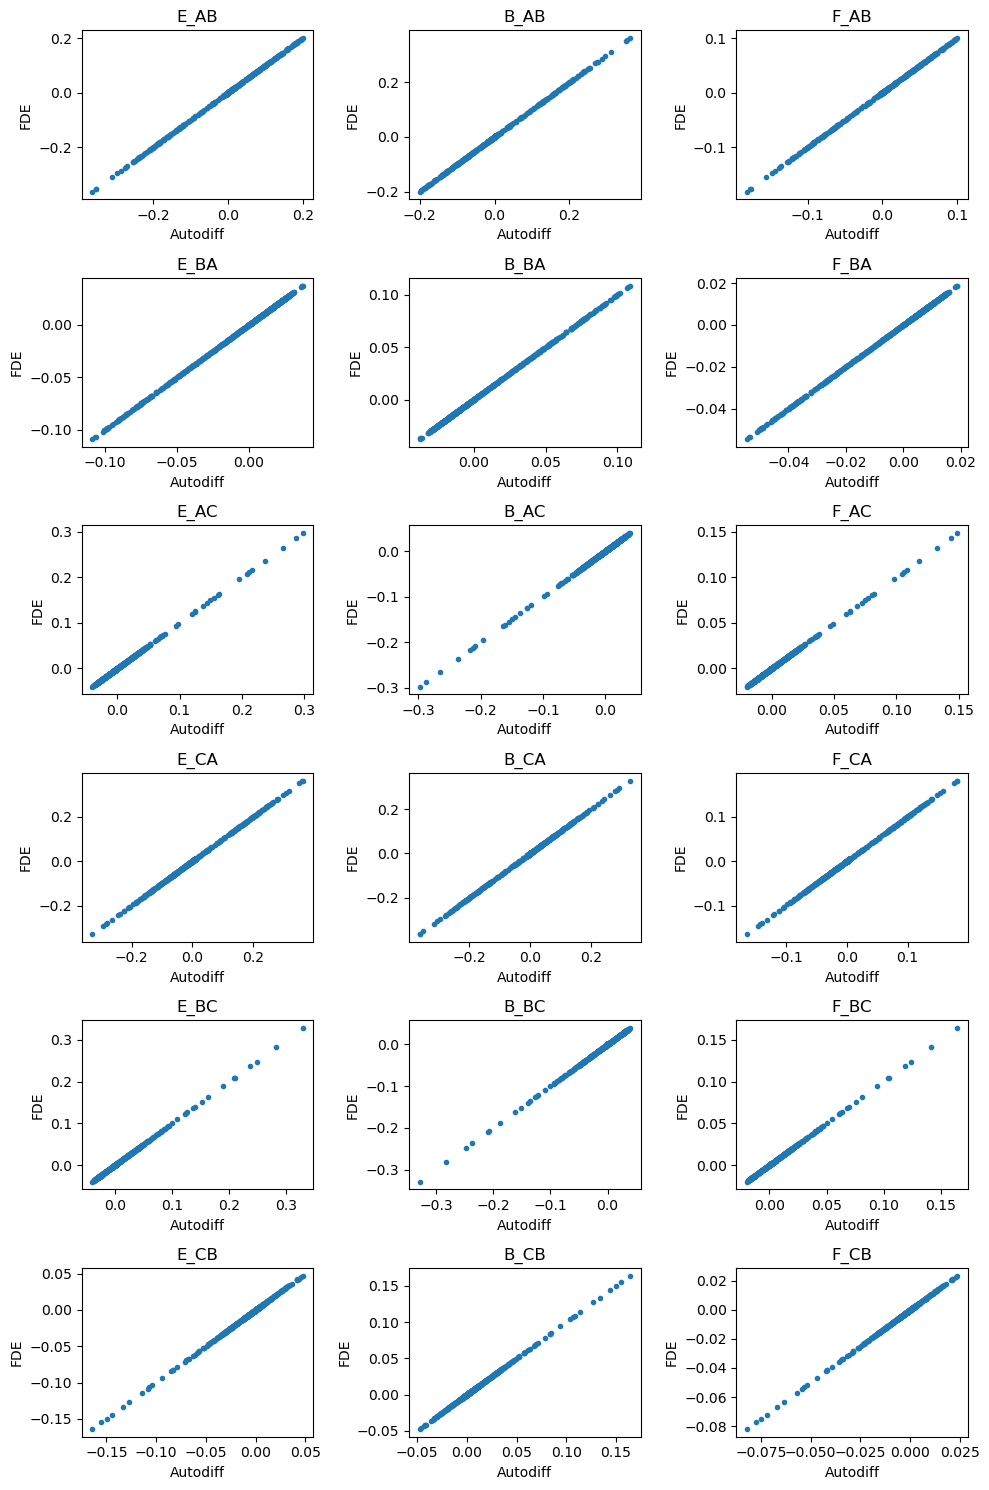

In [9]:
fig =plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(6, 3)
for  epoch in grads_per_epoch_autodiff.keys():
    epoch_grads_autodiff=np.array(grads_per_epoch_autodiff[epoch])
    epoch_grads_fde=np.array(grads_per_epoch_fde[epoch])

    #plot autodiff vs fde grads for each param 
    for i, data in enumerate(zip(epoch_grads_autodiff.T, epoch_grads_fde.T)):
        ad, fde =data
        ax_subplot = fig.add_subplot(gs[i//3, i%3]) 
        ax_subplot.scatter(ad, fde, marker='.')
        ax_subplot.set_title(f'{params[i]}')
        ax_subplot.set_xlabel('Autodiff')
        ax_subplot.set_ylabel('FDE')

fig.tight_layout()
fig.savefig('data/autodiff_vs_fde.png')